# Elon Musk's Tweets Data Analysis

In [1]:
!pip install wordcloud
!pip install -U textblob-de


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from wordcloud import WordCloud, STOPWORDS
from sklearn.decomposition import LatentDirichletAllocation
from collections import Counter
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import warnings
warnings.simplefilter("ignore")


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sneha\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
tweets_df = pd.read_csv("TweetsElonMusk.csv")

# About the Data Set

In [4]:
tweets_df.head(2)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1381273474400800773,1381002894032347138,2021-04-11 18:50:33 EEST,2021-04-11,18:50:33,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'vincent13031925', 'name': 'V...",NaN,NaN,NaN,NaN
1,1381273076709478403,1372444955050971142,2021-04-11 18:48:58 EEST,2021-04-11,18:48:58,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [5]:
tweets_df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [6]:
tweets_df.describe()


,id,conversation_id,timezone,user_id,place,replies_count,retweets_count,likes_count,video,near,geo,source,user_rt_id,user_rt,retweet_id,retweet_date,translate,trans_src,trans_dest
count,1.256200e+04,1.256200e+04,12562.0,12562.0,0.0,12562.000000,12562.000000,1.256200e+04,12562.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,1.049919e+18,1.047490e+18,300.0,44196397.0,NaN,679.370005,2256.727193,2.147006e+04,0.063047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.761981e+17,2.783202e+17,0.0,0.0,NaN,2453.853763,9793.382524,6.727787e+04,0.243058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.543473e+10,1.659576e+09,300.0,44196397.0,NaN,0.000000,0.000000,2.000000e+00,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,9.444958e+17,9.413883e+17,300.0,44196397.0,NaN,45.000000,45.000000,8.790000e+02,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.117568e+18,1.117117e+18,300.0,44196397.0,NaN,113.000000,144.500000,2.439500e+03,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.255896e+18,1.254922e+18,300.0,44196397.0,NaN,373.000000,847.750000,1.128250e+04,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1.383296e+18,1.383296e+18,300.0,44196397.0,NaN,61349.000000,361461.000000,1.593425e+06,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12562 entries, 0 to 12561
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               12562 non-null  int64  
 1   conversation_id  12562 non-null  int64  
 2   created_at       12562 non-null  object 
 3   date             12562 non-null  object 
 4   time             12562 non-null  object 
 5   timezone         12562 non-null  int64  
 6   user_id          12562 non-null  int64  
 7   username         12562 non-null  object 
 8   name             12562 non-null  object 
 9   place            0 non-null      float64
 10  tweet            12562 non-null  object 
 11  language         12562 non-null  object 
 12  mentions         12562 non-null  object 
 13  urls             12562 non-null  object 
 14  photos           12562 non-null  object 
 15  replies_count    12562 non-null  int64  
 16  retweets_count   12562 non-null  int64  
 17  likes_count 

# 2. Exploratory Data Analysis on the dataset

*a) How many tweets are in this dataset?*

In [8]:
tweets_df.head(2)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1381273474400800773,1381002894032347138,2021-04-11 18:50:33 EEST,2021-04-11,18:50:33,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'vincent13031925', 'name': 'V...",NaN,NaN,NaN,NaN
1,1381273076709478403,1372444955050971142,2021-04-11 18:48:58 EEST,2021-04-11,18:48:58,300,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [9]:
tweets_df.shape

(12562, 36)

In [10]:
tweets_df.index

RangeIndex(start=0, stop=12562, step=1)

* Drop columns that have all entries are null

In [11]:
#Check for null values
tweets_df.isnull().any()

id                 False
conversation_id    False
created_at         False
date               False
time               False
timezone           False
user_id            False
username           False
name               False
place               True
tweet              False
language           False
mentions           False
urls               False
photos             False
replies_count      False
retweets_count     False
likes_count        False
hashtags           False
cashtags           False
link               False
retweet            False
quote_url           True
video              False
thumbnail           True
near                True
geo                 True
source              True
user_rt_id          True
user_rt             True
retweet_id          True
reply_to           False
retweet_date        True
translate           True
trans_src           True
trans_dest          True
dtype: bool

In [12]:
tweets_df.count()


id                 12562
conversation_id    12562
created_at         12562
date               12562
time               12562
timezone           12562
user_id            12562
username           12562
name               12562
place                  0
tweet              12562
language           12562
mentions           12562
urls               12562
photos             12562
replies_count      12562
retweets_count     12562
likes_count        12562
hashtags           12562
cashtags           12562
link               12562
retweet            12562
quote_url            410
video              12562
thumbnail            792
near                   0
geo                    0
source                 0
user_rt_id             0
user_rt                0
retweet_id             0
reply_to           12562
retweet_date           0
translate              0
trans_src              0
trans_dest             0
dtype: int64

In [13]:
tweets_df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [14]:
tweets = tweets_df.drop(['place','quote_url', 'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id','retweet_date', 'translate', 'trans_src',
       'trans_dest'],axis =1)

In [15]:
tweets.shape

(12562, 23)

In [16]:
tweets.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'tweet', 'language', 'mentions', 'urls',
       'photos', 'replies_count', 'retweets_count', 'likes_count', 'hashtags',
       'cashtags', 'link', 'retweet', 'video', 'reply_to'],
      dtype='object')

# * The date of his first and last post in this data set?

In [17]:
date_sort = tweets.sort_values(by = "created_at", ascending = True)
date_sort['created_at']

12514    2010-06-04 21:31:57 EEST
12513     2011-12-01 11:55:11 EET
12512     2011-12-01 12:29:04 EET
12511     2011-12-03 10:20:28 EET
12510     2011-12-03 10:22:07 EET
                   ...           
12519    2021-04-17 04:37:48 EEST
12518    2021-04-17 07:16:45 EEST
12517    2021-04-17 07:46:34 EEST
12516    2021-04-17 07:51:09 EEST
12515    2021-04-17 08:46:56 EEST
Name: created_at, Length: 12562, dtype: object

In [18]:
print("First tweet was made on ",date_sort['created_at'][12514 ])

First tweet was made on  2010-06-04 21:31:57 EEST


In [19]:
first_tweet = date_sort['created_at'][12514]
Tweet = date_sort.loc[date_sort['created_at'] == first_tweet, 'tweet'].iloc[0]
print("Elon Musk's first tweet was in this data set- ' ",Tweet, "Posted on - ", first_tweet )

Elon Musk's first tweet was in this data set- '  Please ignore prior tweets, as that was someone pretending to be me :)  This is actually me. Posted on -  2010-06-04 21:31:57 EEST


In [20]:
date_sort = tweets.sort_values(by = "created_at", ascending = False)
date_sort['created_at']

12515    2021-04-17 08:46:56 EEST
12516    2021-04-17 07:51:09 EEST
12517    2021-04-17 07:46:34 EEST
12518    2021-04-17 07:16:45 EEST
12519    2021-04-17 04:37:48 EEST
                   ...           
12510     2011-12-03 10:22:07 EET
12511     2011-12-03 10:20:28 EET
12512     2011-12-01 12:29:04 EET
12513     2011-12-01 11:55:11 EET
12514    2010-06-04 21:31:57 EEST
Name: created_at, Length: 12562, dtype: object

In [21]:
print("Last tweet was made in this data set on ",date_sort['created_at'][12515 ])

Last tweet was made in this data set on  2021-04-17 08:46:56 EEST


In [22]:
last_tweet = date_sort['created_at'][12515]
Tweet = date_sort.loc[date_sort['created_at'] == last_tweet, 'tweet'].iloc[0]
print("Elon Musk's last tweet in this data set was - ' ",Tweet, "Posted on - ", last_tweet )

Elon Musk's last tweet in this data set was - '  Dragon spacecraft &amp; Falcon 9 rocket  https://t.co/A6fsNlsN9z Posted on -  2021-04-17 08:46:56 EEST


# * His most liked tweet, what was it about?

In [23]:
tweets.head(2)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,tweet,...,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,video,reply_to
0,1381273474400800773,1381002894032347138,2021-04-11 18:50:33 EEST,2021-04-11,18:50:33,300,44196397,elonmusk,Elon Musk,@vincent13031925 For now. Costs are decreasing...,...,[],640,444,15281,[],[],https://twitter.com/elonmusk/status/1381273474...,False,0,"[{'screen_name': 'vincent13031925', 'name': 'V..."
1,1381273076709478403,1372444955050971142,2021-04-11 18:48:58 EEST,2021-04-11,18:48:58,300,44196397,elonmusk,Elon Musk,Love this beautiful shot,...,[],2464,1517,71161,[],[],https://twitter.com/elonmusk/status/1381273076...,False,0,[]


In [24]:
tweets["likes_count"].sort_values(ascending=False)

3694     1593425
7595     1202081
528      1003772
716       931237
164       902515
          ...   
12020          3
12290          2
12393          2
12413          2
12430          2
Name: likes_count, Length: 12562, dtype: int64

In [25]:
tweets.iloc[3694]

id                                               1236029449042198528
conversation_id                                  1236029449042198528
created_at                                   2020-03-06 22:42:39 EET
date                                                      2020-03-06
time                                                        22:42:39
timezone                                                         300
user_id                                                     44196397
username                                                    elonmusk
name                                                       Elon Musk
tweet                                  The coronavirus panic is dumb
language                                                          en
mentions                                                          []
urls                                                              []
photos                                                            []
replies_count                     

In [26]:
tweets.iloc[3694]["tweet"]

'The coronavirus panic is dumb'

* His least liked tweet, what was it about?

In [27]:
tweets["likes_count"].sort_values()

12413          2
12393          2
12290          2
12430          2
12434          3
          ...   
164       902515
716       931237
528      1003772
7595     1202081
3694     1593425
Name: likes_count, Length: 12562, dtype: int64

In [28]:
tweets["likes_count"].sort_values().head()

12413    2
12393    2
12290    2
12430    2
12434    3
Name: likes_count, dtype: int64

In [29]:
tweets.iloc[12413]["tweet"]

'@LooperNor Yes, this will, if all goes well, be the first commercial spaceship to dock with the Space Station. T zero ~ end of April.'

# * What are the least and most number of likes in a form of plots?

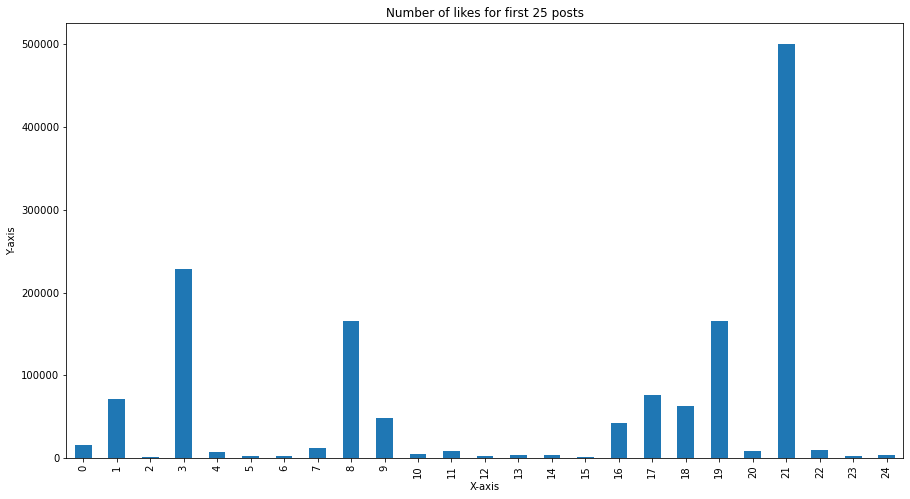

In [30]:
tweets['likes_count'].head(25).plot(kind = 'bar', figsize = (15,8), title = "Number of likes for first 25 posts")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

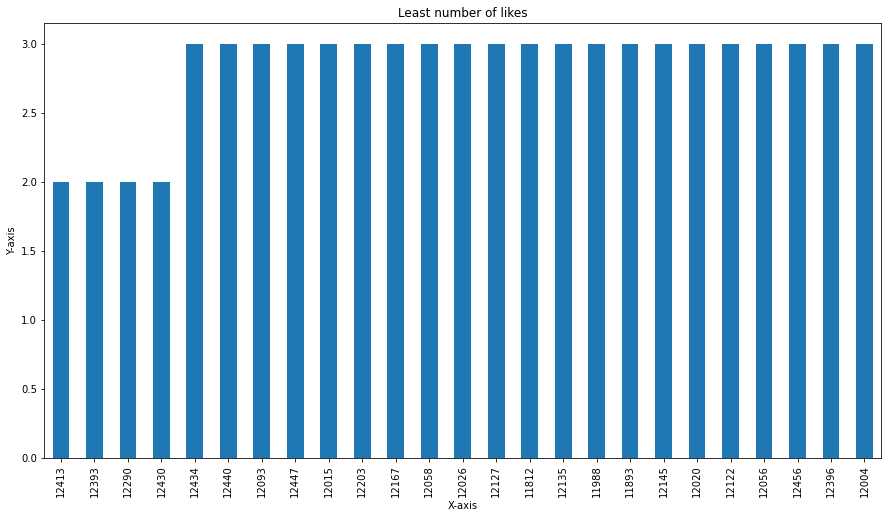

In [31]:
sorted_df = tweets.sort_values(by = "likes_count", ascending = True)
sorted_df['likes_count'].head(25).plot(kind = 'bar', figsize = (15,8), title = "Least number of likes")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

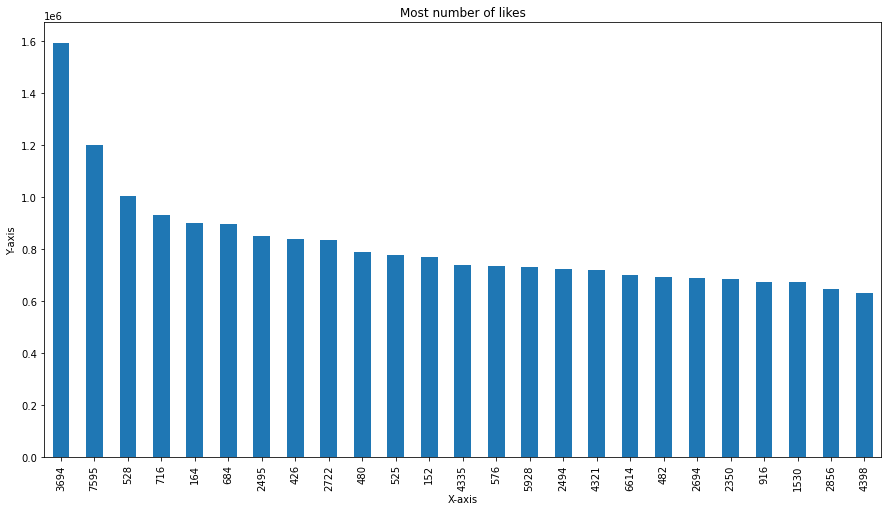

In [32]:
sorted_df = tweets.sort_values(by = "likes_count", ascending = False)
sorted_df['likes_count'].head(25).plot(kind = 'bar', figsize = (15,8), title = "Most number of likes")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

# Data Exploration

* Missing Data

In [33]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [34]:
missing_data(tweets)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,tweet,...,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,video,reply_to
Total,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Types,int64,int64,object,object,object,int64,int64,object,object,object,...,object,int64,int64,int64,object,object,object,bool,int64,object


* Unique Values

In [35]:
def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return(np.transpose(tt))

In [36]:
unique_values(tweets)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,tweet,...,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,video,reply_to
Total,12562,12562,12562,12562,12562,12562,12562,12562,12562,12562,...,12562,12562,12562,12562,12562,12562,12562,12562,12562,12562
Uniques,12562,6423,12559,2037,11524,1,1,1,1,12504,...,727,2221,3338,7696,32,3,12562,1,2,5358


*Most frequent values

In [37]:
def most_frequent_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        try:
            itm = data[col].value_counts().index[0]
            val = data[col].value_counts().values[0]
            items.append(itm)
            vals.append(val)
        except Exception as ex:
            print(ex)
            items.append(0)
            vals.append(0)
            continue
    tt['Most frequent item'] = items
    tt['Frequence'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(tt))

In [38]:
most_frequent_values(tweets)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,tweet,...,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,video,reply_to
Total,12562,12562,12562,12562,12562,12562,12562,12562,12562,12562,...,12562,12562,12562,12562,12562,12562,12562,12562,12562,12562
Most frequent item,1381273474400800773,828280866451374085,2018-05-25 21:23:42 EEST,2018-06-17,01:27:37,300,44196397,elonmusk,Elon Musk,@flcnhvy True,...,[],26,30,5,[],[],https://twitter.com/elonmusk/status/1381273474...,False,0,[]
Frequence,1,33,2,59,4,12562,12562,12562,12562,6,...,11836,96,104,23,12516,12560,1,12562,11770,4417
Percent from total,0.008,0.263,0.016,0.47,0.032,100.0,100.0,100.0,100.0,0.048,...,94.221,0.764,0.828,0.183,99.634,99.984,0.008,100.0,93.695,35.162


* Text wordcloauds

In [39]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, mask=None, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U", "Comment", "text", "attr", "object"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,mask=mask, background_color="white").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()    

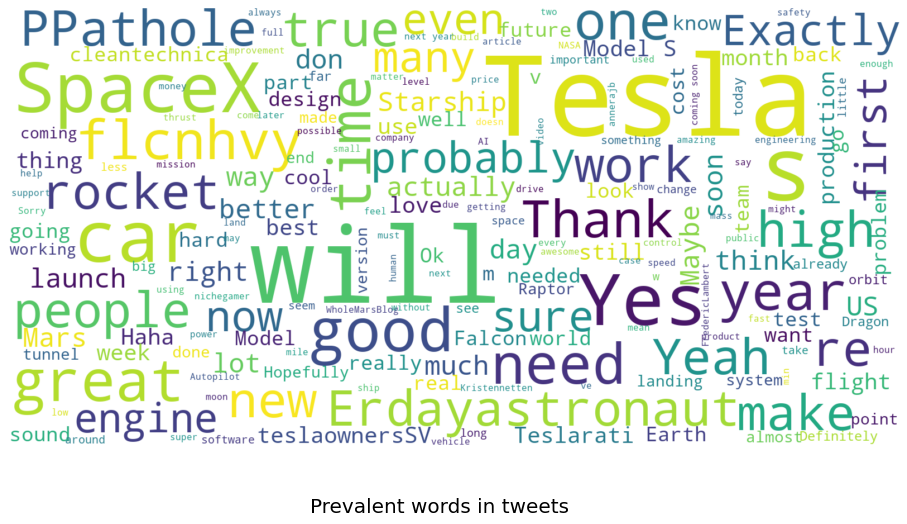

In [40]:
show_wordcloud(tweets['tweet'], title = 'Prevalent words in tweets')

* Extract date and time features

In [41]:
tweets['datedt'] = pd.to_datetime(tweets['date'])

In [42]:
tweets['year'] = tweets['datedt'].dt.year
tweets['month'] = tweets['datedt'].dt.month
tweets['day'] = tweets['datedt'].dt.day
tweets['dayofweek'] = tweets['datedt'].dt.dayofweek
tweets['hour'] = tweets['datedt'].dt.hour
tweets['minute'] = tweets['datedt'].dt.minute
tweets['dayofyear'] = tweets['datedt'].dt.dayofyear
tweets['date_only'] = tweets['datedt'].dt.date

In [43]:
tweets_agg_df = tweets.groupby(["date"])["tweet"].count().reset_index()
tweets_agg_df.columns = ["date", "count"]

In [44]:
def plot_time_variation(df, x='date', y='count', hue=None, size=1, title="", is_log=False):
    f, ax = plt.subplots(1,1, figsize=(4*size,3*size))
    g = sns.lineplot(x=x, y=y, hue=hue, data=df)
    plt.xticks(rotation=90)
    if hue:
        plt.title(f'{y} grouped by {hue} | {title}')
    else:
        plt.title(f'{y} | {title}')
    if(is_log):
        ax.set(yscale="log")
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.show() 

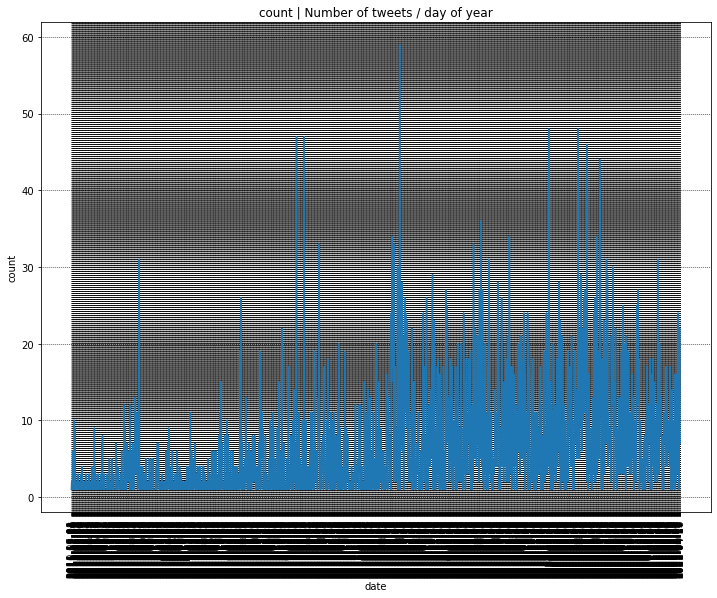

In [45]:
plot_time_variation(tweets_agg_df, title="Number of tweets / day of year",size=3)

In [46]:

def plot_count(feature, title, df, size=1, ordered=True):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    if ordered:
        g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    else:
        g = sns.countplot(df[feature], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()   

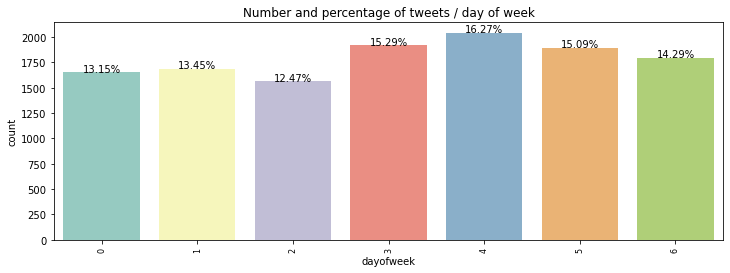

In [47]:
plot_count("dayofweek", "tweets / day of week", tweets, size=3, ordered=False)

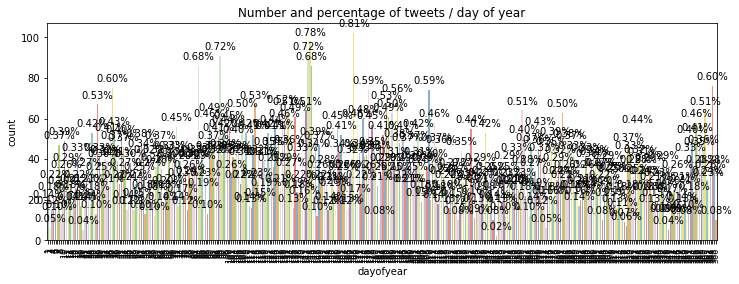

In [48]:
plot_count("dayofyear", "tweets / day of year", tweets, size=3, ordered=False)

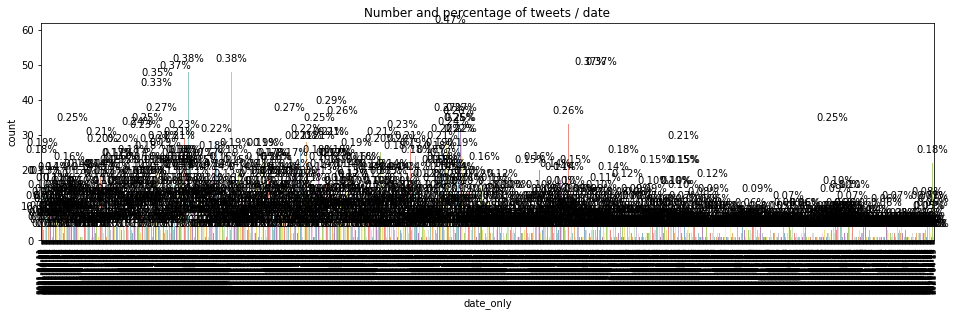

In [49]:
plot_count("date_only", "tweets / date", tweets,size=4, ordered=False)

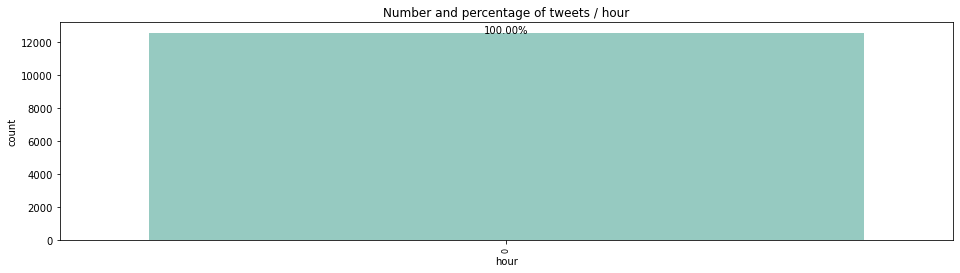

In [50]:
plot_count("hour", "tweets / hour", tweets,size=4, ordered=False)

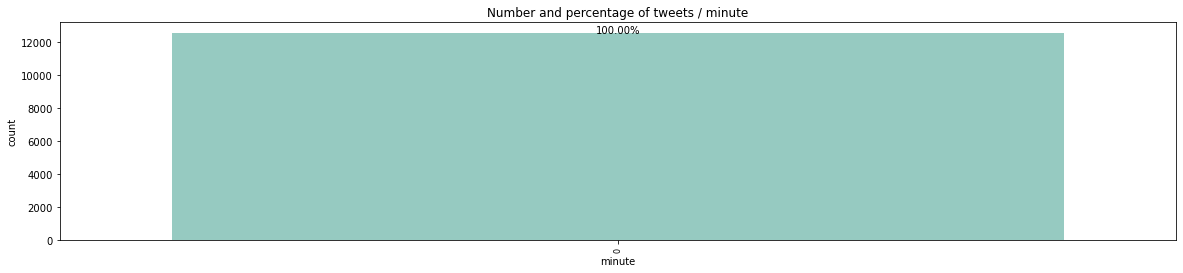

In [51]:
plot_count("minute", "tweets / minute", tweets,size=5, ordered=False)

In [52]:
# borrowed from https://www.kaggle.com/pashupatigupta/sentiments-transformer-vader-embedding-bert
sia = SentimentIntensityAnalyzer()
def find_sentiment(post):
    try:
        if sia.polarity_scores(post)["compound"] > 0:
            return "Positive"
        elif sia.polarity_scores(post)["compound"] < 0:
            return "Negative"
        else:
            return "Neutral"  
    except:
        return "Neutral"

In [53]:
def plot_sentiment(df, feature, title):
    counts = df[feature].value_counts()
    percent = counts/sum(counts)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

    counts.plot(kind='bar', ax=ax1, color='green')
    percent.plot(kind='bar', ax=ax2, color='blue')
    ax1.set_ylabel(f'Counts : {title} sentiments', size=12)
    ax2.set_ylabel(f'Percentage : {title} sentiments', size=12)
    plt.suptitle(f"Sentiment analysis: {title}")
    plt.tight_layout()
    plt.show()

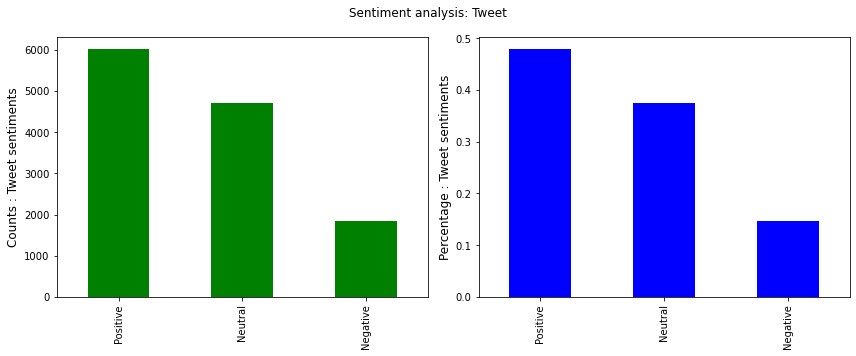

In [54]:
tweets['text_sentiment'] = tweets['tweet'].apply(lambda x: find_sentiment(x))
plot_sentiment(tweets, 'text_sentiment', 'Tweet')

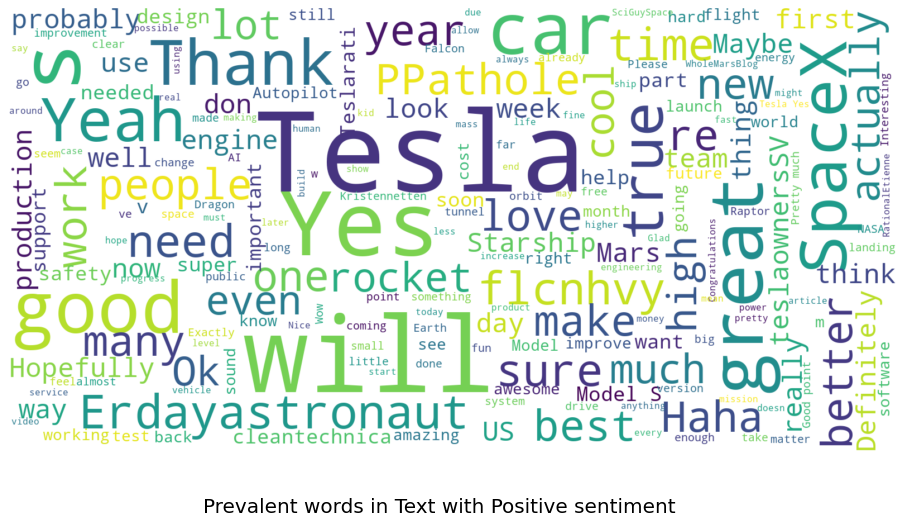

In [55]:
show_wordcloud(tweets.loc[tweets['text_sentiment']=="Positive", 'tweet'], title = 'Prevalent words in Text with Positive sentiment', mask=None)

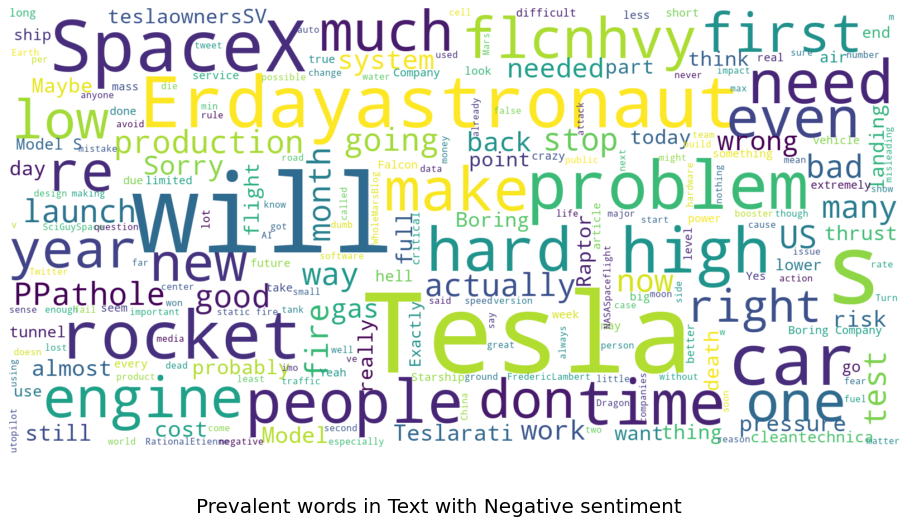

In [56]:
show_wordcloud(tweets.loc[tweets['text_sentiment']=="Negative", 'tweet'], title = 'Prevalent words in Text with Negative sentiment', mask=None)

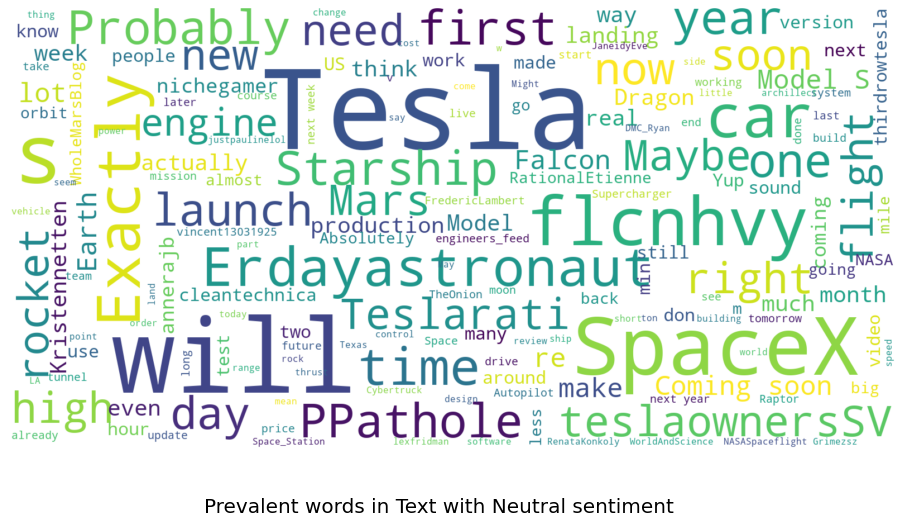

In [57]:
show_wordcloud(tweets.loc[tweets['text_sentiment']=="Neutral", 'tweet'], title = 'Prevalent words in Text with Neutral sentiment', mask=None)

In [58]:
tweets.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'tweet', 'language', 'mentions', 'urls',
       'photos', 'replies_count', 'retweets_count', 'likes_count', 'hashtags',
       'cashtags', 'link', 'retweet', 'video', 'reply_to', 'datedt', 'year',
       'month', 'day', 'dayofweek', 'hour', 'minute', 'dayofyear', 'date_only',
       'text_sentiment'],
      dtype='object')

In [59]:
tweets.shape

(12562, 33)

In [60]:
tweets_df.shape

(12562, 36)

In [61]:
unique_values(tweets)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,tweet,...,datedt,year,month,day,dayofweek,hour,minute,dayofyear,date_only,text_sentiment
Total,12562,12562,12562,12562,12562,12562,12562,12562,12562,12562,...,12562,12562,12562,12562,12562,12562,12562,12562,12562,12562
Uniques,12562,6423,12559,2037,11524,1,1,1,1,12504,...,2037,12,12,31,7,1,1,366,2037,3


In [62]:
tweets.head(5)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,tweet,...,datedt,year,month,day,dayofweek,hour,minute,dayofyear,date_only,text_sentiment
0,1381273474400800773,1381002894032347138,2021-04-11 18:50:33 EEST,2021-04-11,18:50:33,300,44196397,elonmusk,Elon Musk,@vincent13031925 For now. Costs are decreasing...,...,2021-04-11,2021,4,11,6,0,0,101,2021-04-11,Neutral
1,1381273076709478403,1372444955050971142,2021-04-11 18:48:58 EEST,2021-04-11,18:48:58,300,44196397,elonmusk,Elon Musk,Love this beautiful shot,...,2021-04-11,2021,4,11,6,0,0,101,2021-04-11,Positive
2,1381258144916008964,1381230136918433792,2021-04-11 17:49:38 EEST,2021-04-11,17:49:38,300,44196397,elonmusk,Elon Musk,@agnostoxxx @CathieDWood @ARKInvest Trust the ...,...,2021-04-11,2021,4,11,6,0,0,101,2021-04-11,Positive
3,1381221447322935303,1381221447322935303,2021-04-11 15:23:49 EEST,2021-04-11,15:23:49,300,44196397,elonmusk,Elon Musk,The art In Cyberpunk is incredible,...,2021-04-11,2021,4,11,6,0,0,101,2021-04-11,Neutral
4,1381129584435818496,1381079981485252611,2021-04-11 09:18:47 EEST,2021-04-11,09:18:47,300,44196397,elonmusk,Elon Musk,@itsALLrisky 🤣🤣,...,2021-04-11,2021,4,11,6,0,0,101,2021-04-11,Neutral


 * Drop features that have only one unique value

In [63]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12562 entries, 0 to 12561
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               12562 non-null  int64         
 1   conversation_id  12562 non-null  int64         
 2   created_at       12562 non-null  object        
 3   date             12562 non-null  object        
 4   time             12562 non-null  object        
 5   timezone         12562 non-null  int64         
 6   user_id          12562 non-null  int64         
 7   username         12562 non-null  object        
 8   name             12562 non-null  object        
 9   tweet            12562 non-null  object        
 10  language         12562 non-null  object        
 11  mentions         12562 non-null  object        
 12  urls             12562 non-null  object        
 13  photos           12562 non-null  object        
 14  replies_count    12562 non-null  int64

In [64]:
tweets.dtypes

id                          int64
conversation_id             int64
created_at                 object
date                       object
time                       object
timezone                    int64
user_id                     int64
username                   object
name                       object
tweet                      object
language                   object
mentions                   object
urls                       object
photos                     object
replies_count               int64
retweets_count              int64
likes_count                 int64
hashtags                   object
cashtags                   object
link                       object
retweet                      bool
video                       int64
reply_to                   object
datedt             datetime64[ns]
year                        int64
month                       int64
day                         int64
dayofweek                   int64
hour                        int64
minute        

In [65]:
tweets.isnull()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,tweet,...,datedt,year,month,day,dayofweek,hour,minute,dayofyear,date_only,text_sentiment
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12557,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12558,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12559,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12560,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [66]:
tweets.isnull().sum()

id                 0
conversation_id    0
created_at         0
date               0
time               0
timezone           0
user_id            0
username           0
name               0
tweet              0
language           0
mentions           0
urls               0
photos             0
replies_count      0
retweets_count     0
likes_count        0
hashtags           0
cashtags           0
link               0
retweet            0
video              0
reply_to           0
datedt             0
year               0
month              0
day                0
dayofweek          0
hour               0
minute             0
dayofyear          0
date_only          0
text_sentiment     0
dtype: int64